In [185]:
import fileinput
import time
import pandas as pdx
import json
import pandas as pd
from datetime import datetime
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [18, 7]


In [94]:
with open(r"DATA/RUN2/1677280636.txt", 'r') as myFile:
    dataList = myFile.read().split('\n')

In [95]:
dataStr = dataList[1]

In [96]:
dataDict = json.loads(dataStr.replace("'", "\""))

In [103]:
dfo = pd.DataFrame.from_dict(dataDict['ObdData'])[['Timestamp','ChannelName','Value']]
dfo['Timestamp'] = dfo['Timestamp'].apply(lambda x:int(str(x).split('.')[0]))
dfo['Timestamp'] = dfo['Timestamp'].iloc[-1]
dfo = dfo.pivot(index='Timestamp',columns='ChannelName',values='Value')

dfg = pd.DataFrame(dataDict['GyroscopeData'], index=[0])

for c in dfg.columns:
    dfo[c] = dfg[c].iloc[0]

In [104]:
# str(dfo.iloc[0]['Timestamp']).split('.')[0][:-1]

In [143]:
df_final = pd.DataFrame()
i = 0
for dataStr in dataList:
    try:
        dataDict = json.loads(dataStr.replace("'", "\""))
        dfo = pd.DataFrame.from_dict(dataDict['ObdData'])[['Timestamp','ChannelName','Value']]
        dfo['Timestamp'] = dfo['Timestamp'].apply(lambda x:int(str(x).split('.')[0]))
        dfo['Timestamp'] = dfo['Timestamp'].iloc[-1]
        dfo = dfo.pivot(index='Timestamp',columns='ChannelName',values='Value')
        dfg = pd.DataFrame(dataDict['GyroscopeData'], index=[0])
        for c in dfg.columns:
            dfo[c] = dfg[c].iloc[0]
#         print(dfo.shape)
        dfo.reset_index(inplace=True)
        df_final = df_final.append(dfo)
        i+=1
#         print(i)
    except Exception as e:
        i+=1
        print('Failed with: {}'.format(i))
        print(e)


Failed with: 733
Expecting value: line 1 column 1 (char 0)
Failed with: 873
Expecting value: line 1 column 1 (char 0)
Failed with: 1069
Expecting value: line 1 column 1 (char 0)


In [144]:
df_final = df_final.groupby(['Timestamp']).mean().ffill()

In [145]:
df_final.shape

(543, 17)

In [146]:
df_final.reset_index(inplace=True)

In [147]:
df_final['Datetime'] = pd.to_datetime(df_final['Timestamp'], unit='s')

In [148]:
df_final.set_index('Datetime', inplace=True)

In [149]:
df_final = df_final.resample('1S').mean()

In [150]:
df_final

ChannelName,Timestamp,AbsoluteLoad,AirFlowRate,AmbientTemp,CoolantTemp,EngineLoad,EngineOilTemp,FuelLevel,RPM,Speed,ThrottlePosition,Ax,Ay,Az,Gx,Gy,Gz,IntakeTemp
Datetime,,,,,,,,,,,,,,,,,,
2023-02-24 23:17:17,1.677281e+09,15.686275,3.170000,12.0,63.50,36.470588,48.0,36.470588,651.8750,0.000000,15.686275,-0.016113,-0.037842,0.970581,-0.022901,0.389313,-0.282443,25.000000
2023-02-24 23:17:18,1.677281e+09,14.019608,3.560000,12.0,72.25,39.901961,48.0,36.078431,738.9375,15.500000,15.686275,-0.030884,-0.108887,0.989563,-0.114504,0.444656,-0.120229,15.333333
2023-02-24 23:17:19,1.677281e+09,14.803922,3.652500,12.0,72.25,40.392157,48.0,35.686275,711.1875,13.750000,15.784314,-0.031189,-0.073181,1.012634,-0.519084,0.375954,-0.129771,15.333333
2023-02-24 23:17:20,1.677281e+09,20.294118,7.347500,12.0,72.25,48.823529,48.0,36.078431,824.6875,11.000000,17.647059,-0.038940,-0.091492,1.019043,0.040076,0.469466,-0.070611,15.333333
2023-02-24 23:17:21,1.677281e+09,23.398693,10.153333,12.0,74.00,58.562092,48.0,36.078431,929.5000,13.333333,18.692810,-0.059489,0.075114,0.937663,-0.409669,0.837150,1.987277,15.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-24 23:27:10,1.677281e+09,10.588235,3.400000,7.0,86.00,15.294118,77.0,30.980392,1314.0000,37.000000,16.470588,0.206299,0.004639,1.014404,-0.832061,1.312977,-0.992366,12.000000
2023-02-24 23:27:11,1.677281e+09,10.588235,3.430000,7.0,86.00,15.294118,77.0,31.372549,1315.5000,39.000000,16.470588,0.081055,-0.109131,1.019775,0.122137,0.190840,-1.022901,12.000000
2023-02-24 23:27:12,1.677281e+09,10.588235,3.290000,7.0,85.00,15.294118,77.0,33.725490,1271.7500,37.000000,16.470588,0.037109,-0.108887,0.950439,-0.198473,0.603053,-1.015267,12.000000


In [124]:
# df_final.to_csv('addedGyroscope.csv')

In [38]:
# plt.rcParams['figure.figsize'] = [18, 7]
# df_final.reset_index()['Speed'].plot(label='Speed [kph]')
# df_final.reset_index()['EngineLoad'].plot(label='Engine Load [%]')
# df_final.reset_index()['EngineOilTemp'].plot(label='Engine Oil Temp [C]')
# df_final.reset_index()['CoolantTemp'].plot(label='Engine Coolant Temp [C]')






# plt.legend()
# plt.xlim(0,500)

(0.0, 500.0)

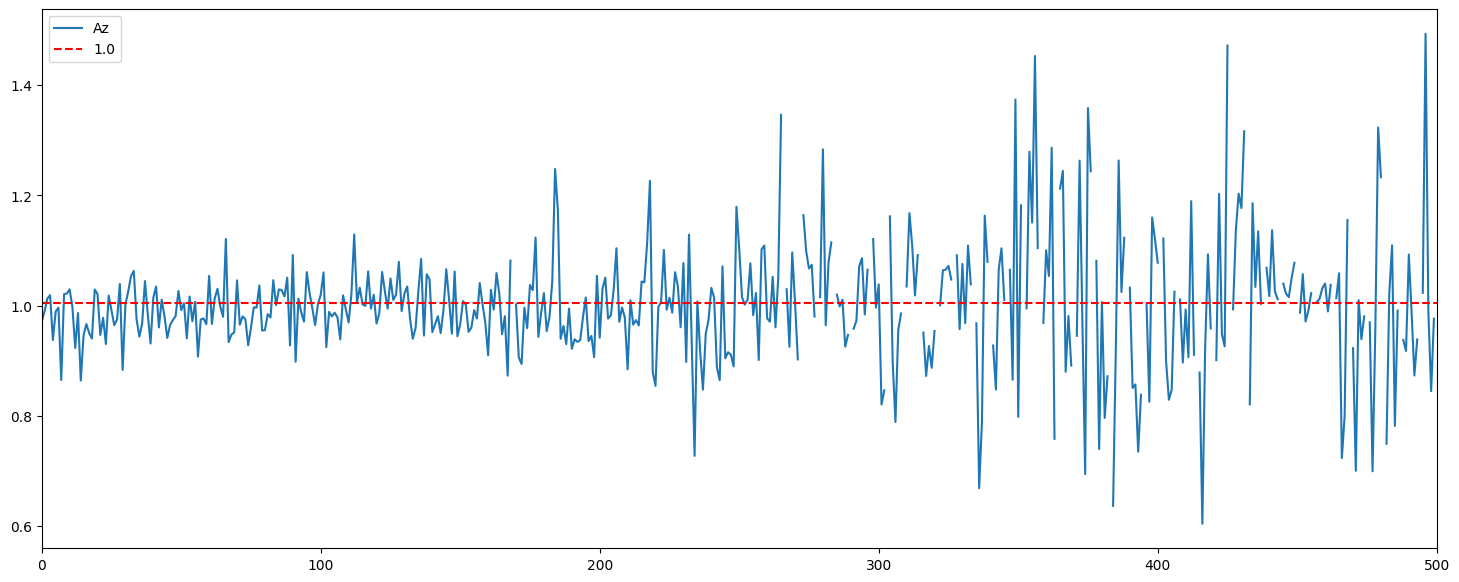

In [151]:
axis = 'Az'

df_final.reset_index()[axis].plot(label=axis)

plt.axhline(df_final[axis].mean(), color='red', linestyle='--', label='{}'.format(round(df_final[axis].mean(),2)))

plt.legend()
plt.xlim(0,500)

Text(0.5, 0, 'Time [s]')

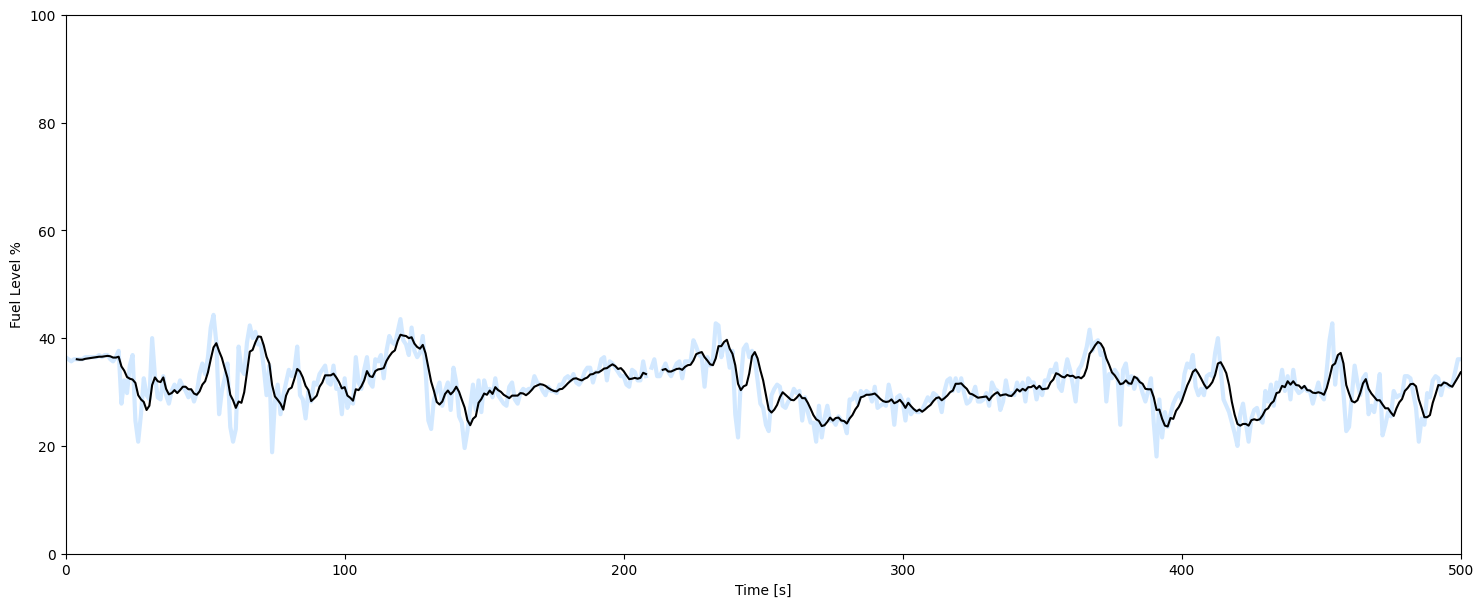

In [105]:
df_final.reset_index()['FuelLevel'].plot(color='dodgerblue', alpha=0.2, linewidth=3)
df_final.reset_index()['FuelLevel'].rolling(5).mean().plot(color = 'black')
plt.ylim(0,100)
plt.xlim(0, 500)
plt.ylabel('Fuel Level %')
plt.xlabel('Time [s]')

In [17]:
df_final.shape

(1066, 17)

In [18]:
df_final

ChannelName,AbsoluteLoad,AirFlowRate,AmbientTemp,CoolantTemp,EngineLoad,EngineOilTemp,FuelLevel,RPM,Speed,ThrottlePosition,Ax,Ay,Az,Gx,Gy,Gz,IntakeTemp
Timestamp,,,,,,,,,,,,,,,,,
1677280637,12.941176,2.17,12.0,67.0,19.215686,48.0,36.470588,733.50,0.0,15.294118,-0.002686,-0.104736,0.955322,-0.129771,0.335878,-0.320611,NaN
1677280638,12.941176,2.17,12.0,67.0,19.215686,48.0,36.078431,726.50,0.0,15.294118,0.015381,-0.121338,1.024658,-0.167939,0.526718,-0.343511,NaN
1677280639,12.941176,2.17,12.0,67.0,19.215686,48.0,35.686275,729.50,0.0,15.294118,-0.004150,-0.102539,0.965332,-0.106870,0.305344,-0.267176,NaN
1677280640,12.941176,2.18,12.0,67.0,19.215686,48.0,36.078431,733.50,0.0,15.294118,-0.019775,-0.111572,0.975586,-0.099237,0.374046,-0.274809,NaN
1677280642,12.941176,2.17,12.0,67.0,19.215686,48.0,36.078431,733.50,0.0,15.294118,-0.013672,-0.097656,0.970947,-0.183206,0.396947,-0.274809,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677280854,13.333333,3.81,NaN,81.0,45.098039,NaN,NaN,735.75,30.0,15.686275,-0.007080,-0.159668,1.021729,-0.129771,0.389313,-0.267176,10.0
1677280856,12.941176,3.84,NaN,81.0,45.882353,NaN,NaN,721.00,27.0,15.686275,0.010742,-0.193604,0.987549,-0.137405,0.564885,-0.290076,10.0
1677280857,12.156863,3.82,NaN,81.0,44.313725,NaN,NaN,783.50,23.0,15.686275,0.036133,-0.156250,1.025879,1.923664,0.534351,-0.541985,10.0


In [89]:
pd.concat([dfo, dfg], axis=1, ignore_index=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1677280859,14.117647,3.79,81.0,45.882353,10.0,688.25,14.0,15.686275,0.006348,-0.081299,1.105713,-0.603053,0.396947,-0.320611,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006348,-0.081299,1.105713,-0.603053,0.396947,-0.320611


In [90]:
df_final

ChannelName,AbsoluteLoad,AirFlowRate,AmbientTemp,CoolantTemp,EngineLoad,EngineOilTemp,FuelLevel,RPM,Speed,ThrottlePosition,Ax,Ay,Az,Gx,Gy,Gz,IntakeTemp
Timestamp,,,,,,,,,,,,,,,,,
1677280637,12.941176,2.17,12.0,67.0,19.215686,48.0,36.470588,733.50,0.0,15.294118,-0.002686,-0.104736,0.955322,-0.129771,0.335878,-0.320611,NaN
1677280638,12.941176,2.17,12.0,67.0,19.215686,48.0,36.078431,726.50,0.0,15.294118,0.015381,-0.121338,1.024658,-0.167939,0.526718,-0.343511,NaN
1677280639,12.941176,2.17,12.0,67.0,19.215686,48.0,35.686275,729.50,0.0,15.294118,-0.004150,-0.102539,0.965332,-0.106870,0.305344,-0.267176,NaN
1677280640,12.941176,2.18,12.0,67.0,19.215686,48.0,36.078431,733.50,0.0,15.294118,-0.019775,-0.111572,0.975586,-0.099237,0.374046,-0.274809,NaN
1677280642,12.941176,2.17,12.0,67.0,19.215686,48.0,36.078431,733.50,0.0,15.294118,-0.013672,-0.097656,0.970947,-0.183206,0.396947,-0.274809,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677280854,13.333333,3.81,NaN,81.0,45.098039,NaN,NaN,735.75,30.0,15.686275,-0.007080,-0.159668,1.021729,-0.129771,0.389313,-0.267176,10.0
1677280856,12.941176,3.84,NaN,81.0,45.882353,NaN,NaN,721.00,27.0,15.686275,0.010742,-0.193604,0.987549,-0.137405,0.564885,-0.290076,10.0
1677280857,12.156863,3.82,NaN,81.0,44.313725,NaN,NaN,783.50,23.0,15.686275,0.036133,-0.156250,1.025879,1.923664,0.534351,-0.541985,10.0


In [91]:
dfa = dfo.append(dfg).fillna('')

In [92]:
dfo

ChannelName,AbsoluteLoad,AirFlowRate,CoolantTemp,EngineLoad,IntakeTemp,RPM,Speed,ThrottlePosition,Ax,Ay,Az,Gx,Gy,Gz
Timestamp,,,,,,,,,,,,,,
1677280859,14.117647,3.79,81.0,45.882353,10.0,688.25,14.0,15.686275,0.006348,-0.081299,1.105713,-0.603053,0.396947,-0.320611


In [93]:
dfo['A'] = 123

In [94]:
for c in dfg.columns:
    dfo[c] = dfg[c].iloc[0]

In [95]:
dfg = pd.DataFrame(dataDict['GyroscopeData'], index=[0])

In [96]:
dfo

ChannelName,AbsoluteLoad,AirFlowRate,CoolantTemp,EngineLoad,IntakeTemp,RPM,Speed,ThrottlePosition,Ax,Ay,Az,Gx,Gy,Gz,A
Timestamp,,,,,,,,,,,,,,,
1677280859,14.117647,3.79,81.0,45.882353,10.0,688.25,14.0,15.686275,0.006348,-0.081299,1.105713,-0.603053,0.396947,-0.320611,123


# Write to influx

In [186]:
from influxdb_client import InfluxDBClient
from influxdb import InfluxDBClient
from influxdb import DataFrameClient
import requests
import pandas as pd

vehicleTags = {
    'Make':'Toyota',
    'Model':'Rav4',
    'Year':'2022'
}

In [230]:
BUCKET_NAME = 'DigitalTwin'
INFLUX_URL = 'us-east-1-1.aws.cloud2.influxdata.com'
ORG = 'PurdueTeam'
QUERY_URI = 'http://{}/api/v2/write?org={}&bucket={}&precision=s'.format(INFLUX_URL, ORG, BUCKET_NAME)
INFLUX_TOKEN = 'M8Mk8hVzP4lw5dmPP-CwyYPs6JS7XsrgofKFks-1uCUUcvVQ_MXo5m_AhUPGT5RAR9jahgcuZe33A-9TJZcwgw=='

headers = {}
headers['Authorization'] = 'Token {}'.format(INFLUX_TOKEN)
c  # replace with your measurement name
# client = InfluxDBClient(url=url, token=token)
# write_api = client.write_api()

In [249]:
df_final.dropna(inplace=True)

In [250]:
to_write = []

for j in range(df_final.shape[0]):
    data = df_final.iloc[j]
    timestamp = int(df_final.index[j].timestamp())

    # create a dictionary for the tags
    tags = ','.join([f'{k}={v}' for k, v in vehicleTags.items()])

    # create a dictionary for the fields
    fields = {}
    for k, v in data.items():
        if isinstance(v, (int, float)):
            fields[k] = v



    # create the line protocol string
    fields = ','.join([f'{k}={v}' for k, v in data.to_dict().items()])
    # time = series.index[0].strftime('%s')

    line_protocol = f"{measurement},{tags} {fields} {timestamp}"
    # line protocol string can now be written to InfluxDB

    to_write.append(line_protocol)
    
payload = "\n".join(to_write)

In [251]:
r = requests.post(QUERY_URI, data=payload, headers=headers)

In [252]:
r

<Response [204]>

<Response [204]>

In [254]:
print(payload)

Telemetry,Make=Toyota,Model=Rav4,Year=2022 AbsoluteLoad=15.686274509803921,AirFlowRate=3.17,AmbientTemp=12.0,CoolantTemp=63.5,EngineLoad=36.470588235294116,EngineOilTemp=48.0,FuelLevel=36.470588235294116,RPM=651.875,Speed=0.0,ThrottlePosition=15.686274509803923,Ax=-0.01611328125,Ay=-0.037841796875,Az=0.9705810546875,Gx=-0.022900763358778622,Gy=0.3893129770992366,Gz=-0.282442748091603,IntakeTemp=25.0 1677280637
Telemetry,Make=Toyota,Model=Rav4,Year=2022 AbsoluteLoad=14.019607843137255,AirFlowRate=3.56,AmbientTemp=12.0,CoolantTemp=72.25,EngineLoad=39.90196078431373,EngineOilTemp=48.0,FuelLevel=36.07843137254902,RPM=738.9375,Speed=15.5,ThrottlePosition=15.686274509803923,Ax=-0.0308837890625,Ay=-0.10888671875,Az=0.98956298828125,Gx=-0.11450381679389313,Gy=0.4446564885496183,Gz=-0.12022900763358779,IntakeTemp=15.333333333333334 1677280638
Telemetry,Make=Toyota,Model=Rav4,Year=2022 AbsoluteLoad=14.80392156862745,AirFlowRate=3.6525,AmbientTemp=12.0,CoolantTemp=72.25,EngineLoad=40.392156862745

In [189]:
df_final.drop(columns=['Timestamp'], inplace=True)

In [215]:
# assuming the series is stored in a variable called "data"
j = 0

data = df_final.iloc[j]
timestamp = int(df_final.index[j].timestamp())


# create a dictionary for the tags
tags = ','.join([f'{k}={v}' for k, v in vehicleTags.items()])

# create a dictionary for the fields
fields = {}
for k, v in data.items():
    if isinstance(v, (int, float)):
        fields[k] = v
        
    

# create the line protocol string
fields = ','.join([f'{k}={v}' for k, v in data.to_dict().items()])
# time = series.index[0].strftime('%s')

line_protocol = f"{measurement},{tags} {fields} {timestamp}"
# line protocol string can now be written to InfluxDB


In [216]:
line_protocol

'Telemetry,Make=Toyota,Model=Rav4,Year=2022 AbsoluteLoad=15.686274509803921,AirFlowRate=3.17,AmbientTemp=12.0,CoolantTemp=63.5,EngineLoad=36.470588235294116,EngineOilTemp=48.0,FuelLevel=36.470588235294116,RPM=651.875,Speed=0.0,ThrottlePosition=15.686274509803923,Ax=-0.01611328125,Ay=-0.037841796875,Az=0.9705810546875,Gx=-0.022900763358778622,Gy=0.3893129770992366,Gz=-0.282442748091603,IntakeTemp=25.0 1677280637'

1677280637.0

In [172]:
tags

'Make=Toyota,Model=Rav4,Year=2022'